# 0. Import Dependencies

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# 1. Import Dataset

In [25]:
df = pd.read_csv('Car_Purchasing_Data.csv', encoding = 'ISO-8859-1')
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


# 2. Data Visualization and Cleaning

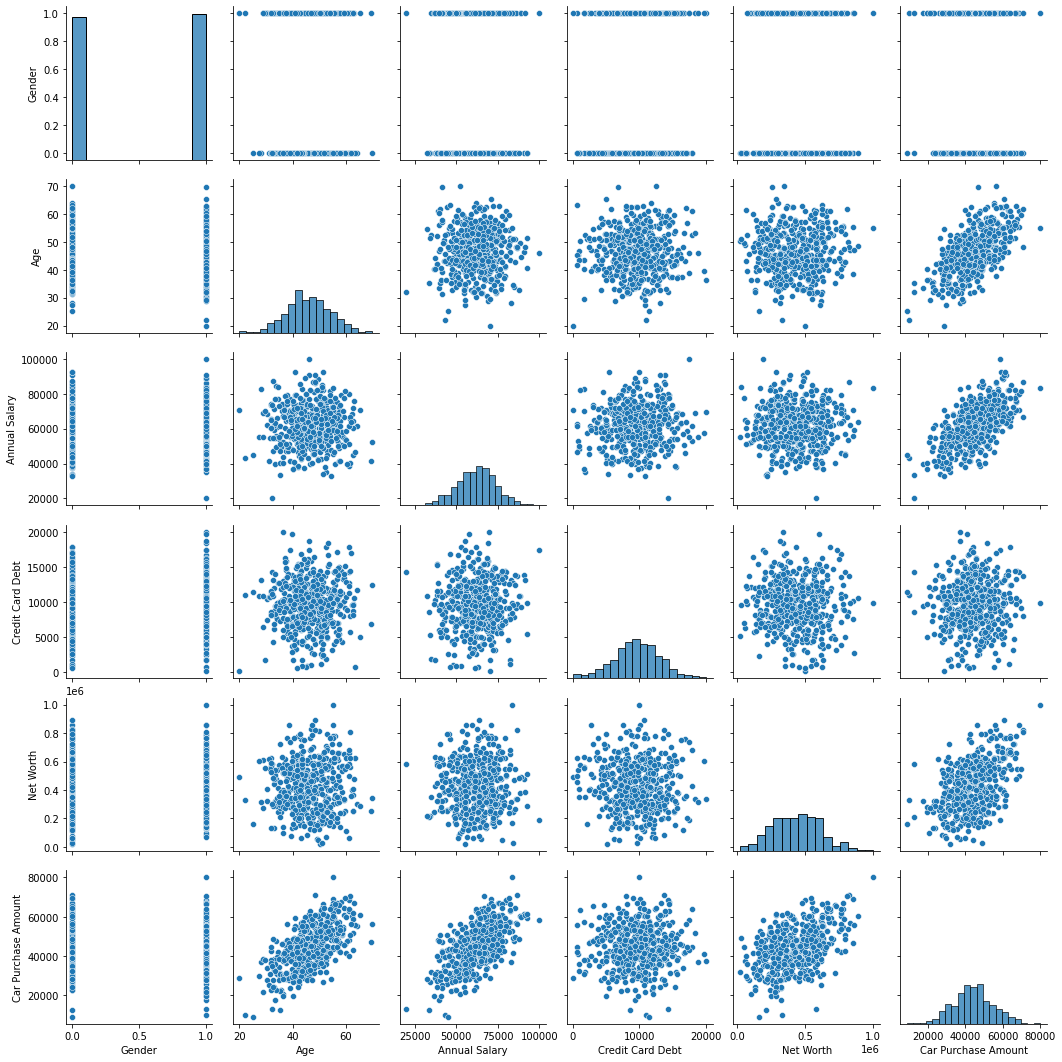

In [26]:
sns.pairplot(df)
plt.show()

In [27]:
X = df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis=1)
X.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671


In [28]:
y = df['Car Purchase Amount'] 
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64

In [29]:
scaler =  MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.        , 0.4370344 , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.41741247, 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46305795, 0.42248189, 0.55579674, 0.63108896],
       ...,
       [1.        , 0.67886994, 0.61110973, 0.52822145, 0.75972584],
       [1.        , 0.78321017, 0.37264988, 0.69914746, 0.3243129 ],
       [1.        , 0.53462305, 0.51713347, 0.46690159, 0.45198622]])

In [30]:
y = scaler.fit_transform(y.values.reshape(-1,1))

# 3. Model Training

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [32]:
X_train.shape, X_test.shape

((425, 5), (75, 5))

In [33]:
model = Sequential()
model.add(Dense(25, input_dim = 5, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 25)                150       
_________________________________________________________________
dense_4 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 26        
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [36]:
epoch_hist = model.fit(X_train, y_train, epochs=25, batch_size= 25, validation_split= 0.2, verbose = 1)

Epoch 1/25
14/14 [==============================] - 1s 23ms/step - loss: 0.5038 - val_loss: 0.3303
Epoch 2/25
14/14 [==============================] - 0s 11ms/step - loss: 0.2678 - val_loss: 0.1962
Epoch 3/25
14/14 [==============================] - 0s 10ms/step - loss: 0.1685 - val_loss: 0.1199
Epoch 4/25
14/14 [==============================] - 0s 10ms/step - loss: 0.1105 - val_loss: 0.0711
Epoch 5/25
14/14 [==============================] - 0s 10ms/step - loss: 0.0607 - val_loss: 0.0429
Epoch 6/25
14/14 [==============================] - 0s 10ms/step - loss: 0.0370 - val_loss: 0.0290
Epoch 7/25
14/14 [==============================] - 0s 10ms/step - loss: 0.0248 - val_loss: 0.0230
Epoch 8/25
14/14 [==============================] - 0s 10ms/step - loss: 0.0230 - val_loss: 0.0184
Epoch 9/25
14/14 [==============================] - 0s 10ms/step - loss: 0.0168 - val_loss: 0.0151
Epoch 10/25
14/14 [==============================] - 0s 32ms/step - loss: 0.0138 - val_loss: 0.0124
Epoch 11/

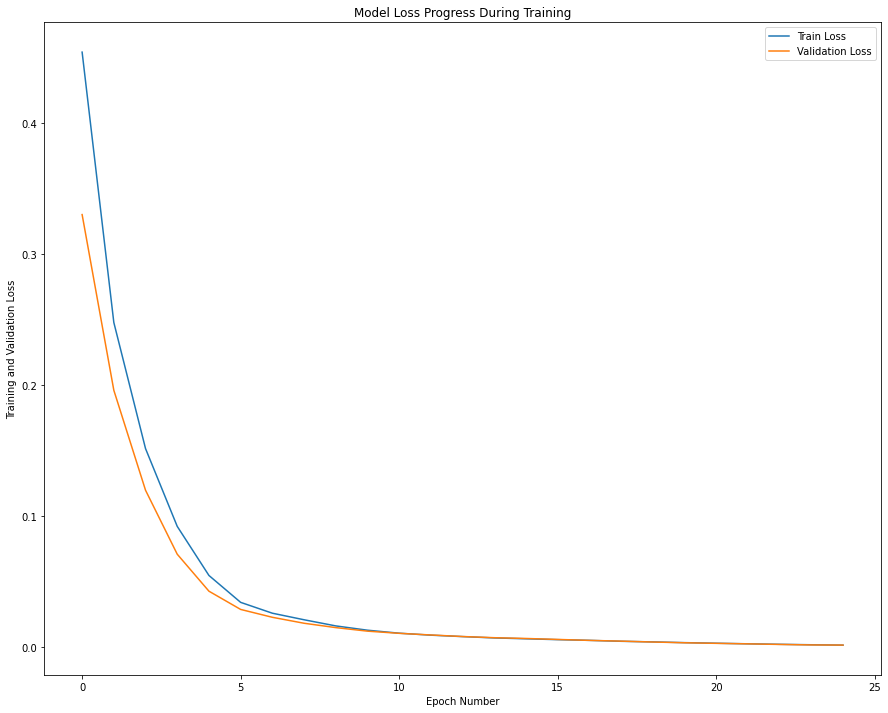

In [37]:
plt.figure(figsize = (15,12))
plt.plot(epoch_hist.history['loss'])
plt.plot(epoch_hist.history['val_loss'])
plt.legend(['Train Loss', 'Validation Loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch Number')
plt.ylabel('Training and Validation Loss')
plt.show()

In [38]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 15ms/step - loss: 0.0019


0.0018759203376248479

In [43]:
X_one = np.array([1,50,50000,10000, 600000]).reshape(1,-1)

In [48]:
y_predict = model.predict(X_one)

In [51]:
print('Expected Purshase Amount:', y_predict.item())

Expected Purshase Amount: 158197.28125
